In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
RAWFILENAME = 'car_price_dataset_real.csv'

In [2]:
def hypothesisFunc(x, theta):
    return theta[1] * x + theta[0]

def makeScatter(df, xname, yname):
    x = df[xname]
    y = df[yname]
    plt.scatter(x, y)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()

In [3]:
df = pd.read_csv(RAWFILENAME, delimiter = ',')

In [4]:
df = df[['car_ID', 'CarName', 'fueltype',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize',
       'horsepower','citympg', 'highwaympg',
       'price']]

In [5]:
df.loc[df.sample(frac=0.07).index, 'enginesize'] = np.nan

In [6]:
df.loc[df.sample(frac=0.1).index, 'price'] = np.nan

In [7]:
df.loc[df.sample(frac=0.11).index, 'horsepower'] = np.nan

In [8]:
df.to_csv('car_price_dataset.csv', index=False)

# 1

In [9]:
FILENAME = 'car_price_dataset.csv'
df = pd.read_csv(FILENAME, delimiter = ',')

In [10]:
df.head().append(df.tail())

,car_ID,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.0
1,2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,NaN,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.0
3,4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,NaN,102.0,24,30,13950.0
4,5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,17450.0
200,201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
201,202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
202,203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
203,204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
204,205,volvo 264gl,gas,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


In [11]:
df.describe()

,car_ID,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,103.000000,174.049268,65.907805,53.724878,2555.565854,127.376963,102.538462,25.219512,30.751220,13309.252254
std,59.322565,12.337289,2.145204,2.443522,520.680204,41.516823,38.430768,6.542142,6.886443,8137.104370
min,1.000000,141.100000,60.300000,47.800000,1488.000000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,52.000000,166.300000,64.100000,52.000000,2145.000000,98.000000,70.000000,19.000000,25.000000,7895.000000
50%,103.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,95.000000,24.000000,30.000000,10198.000000
75%,154.000000,183.100000,66.900000,55.500000,2935.000000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,205.000000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


# 2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
car_ID            205 non-null int64
CarName           205 non-null object
fueltype          205 non-null object
carlength         205 non-null float64
carwidth          205 non-null float64
carheight         205 non-null float64
curbweight        205 non-null int64
cylindernumber    205 non-null object
enginesize        191 non-null float64
horsepower        182 non-null float64
citympg           205 non-null int64
highwaympg        205 non-null int64
price             185 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 18.5+ KB


In [13]:
df['fueltype'] = df['fueltype'].map({'diesel': 1, 'gas': 0})

# 3

In [14]:
df.isna().sum()

car_ID             0
CarName            0
fueltype           0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize        14
horsepower        23
citympg            0
highwaympg         0
price             20
dtype: int64

In [15]:
df[df.columns[:-1]] = df[df.columns[:-1]].fillna(df[df.columns[:-1]].mean())

In [16]:
test = df[np.isnan(df['price']) == True]
df = df.dropna()

# 4

In [17]:
df['cylindernumber'].value_counts()

four      142
six        22
five       10
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

# 5

In [18]:
len(df[(df['horsepower'] > 100) & (df['citympg'] < 15) & (df['fueltype'] == 0)])

3

# 6, 7

In [33]:
tic = time.time()
mean = df.groupby('fueltype', as_index=False)['price'].mean()
toc = time.time()
print(mean)
print("vectorized: %.10f ms" % ((toc - tic) * 1000))

tic = time.time()
mean1 = 0
mean0 = 0
num1 = 0
num0 = 0
for index, row in df.iterrows():
    if pd.isna(row['price']):
        continue
    if row['fueltype'] == 0:
        mean0 += row['price']
        num0 += 1
    if row['fueltype'] == 1:
        mean1 += row['price']
        num1 += 1
mean0 /= num0
mean1 /= num1
toc = time.time()
print("0: %f 1: %f" % (mean0, mean1))
print("for loop: %f ms" % ((toc - tic) * 1000))

   fueltype     price
0         0 -0.041396
1         1  0.384060
vectorized: 5.0005912781 ms
0: -0.041396 1: 0.384060
for loop: 16.001940 ms


# 8

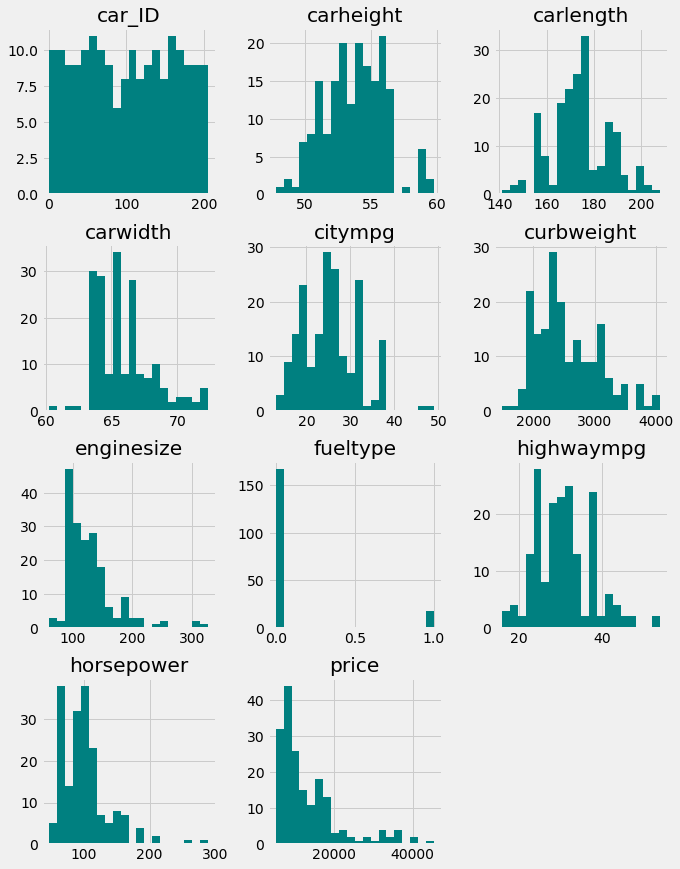

In [20]:
df.hist(figsize = (10,14), color = 'teal', bins = 20)
plt.show()

# 9

In [21]:
df = df[df._get_numeric_data().columns]

In [22]:
def normalize(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

In [23]:
normalize(df, ['price'])

# 10

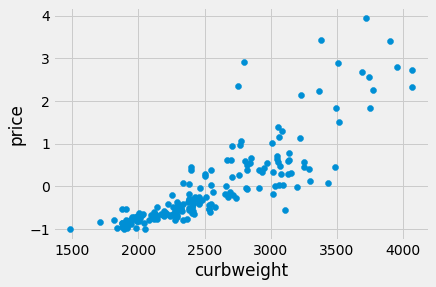

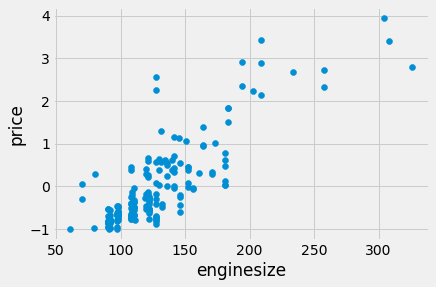

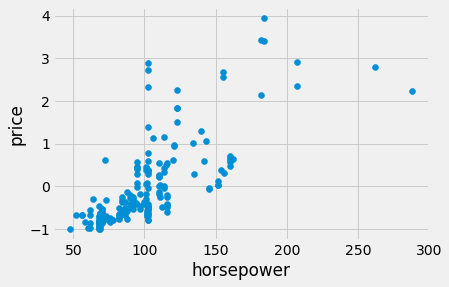

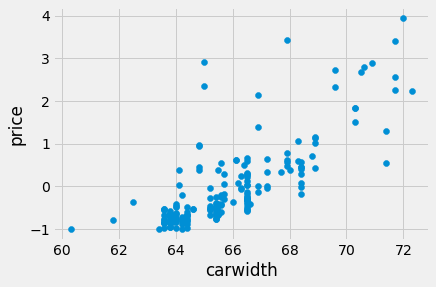

In [24]:
makeScatter(df, 'curbweight', 'price')
makeScatter(df, 'enginesize', 'price')
makeScatter(df, 'horsepower', 'price')
makeScatter(df, 'carwidth', 'price')

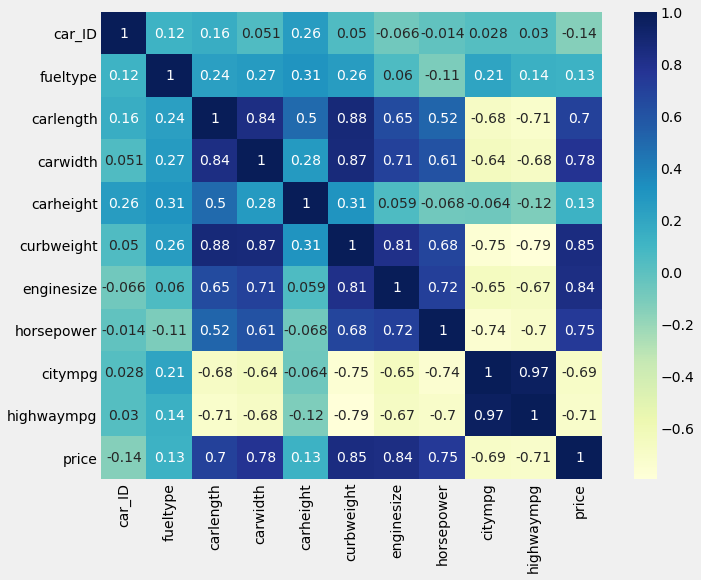

In [25]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# 11, 12, 13

In [26]:
def normalEquation(df, feature):
    x = pd.DataFrame(df[feature])
    x['0'] = 1
    x = x.rename(columns={feature: '1'})
    columnsTitles = ['0','1']
    x = x.reindex(columns=columnsTitles)
    xT = x.transpose()
    xtx = xT.dot(x)
    xtxInv = pd.DataFrame(np.linalg.inv(xtx.values), xtx.columns, xtx.index)
    y = df['price']
    y = y.rename(columns={'price': '0'})
    xty = xT.dot(y)
    theta = xtxInv.dot(xty)
    print(theta)
    
    # m = len(x)
    # xtheta = x.dot(theta)
    # xthetay = xtheta.subtract(y)
    # xthetayT = xthetay.transpose()
    # cost = xthetayT.dot(xthetay)/(m)
    # print("Cost = ", cost)
    return theta
    
def normalEquationUsingNp(df, feature):
    x = df[feature]
    y = df['price']
    w = np.polyfit(x, y, deg=1)
    b, w1 = w[1], w[0]
    theta = [b, w1] 
    return theta
    
def plotLineFit(df, feature, theta):
    x1 = df[feature]
    y1 = df['price']
    plt.scatter(x1, y1)
    plt.plot(x1, hypothesisFunc(x1, theta), color='r')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.legend(['estimation based on Normal Equation', 'correlation'])
    
def calcMSE(df, feature, theta):
    x = df[feature]
    y = df['price']
    yPred = hypothesisFunc(x, theta)
    mse = np.mean((df['price'] - yPred)**2)
    print("mse = ", mse)

In [27]:
theta = dict()

0   -2.127231
1    0.020894
dtype: float64
mse =  0.44084979479273395


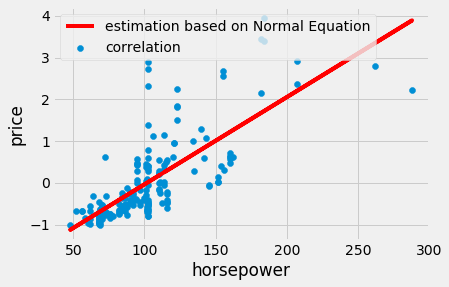

In [28]:
theta['horsepower'] = normalEquation(df, 'horsepower')
plotLineFit(df, 'horsepower', theta['horsepower'])
calcMSE(df, 'horsepower', theta['horsepower'])

0   -2.611085
1    0.020435
dtype: float64
mse =  0.2965665169872275


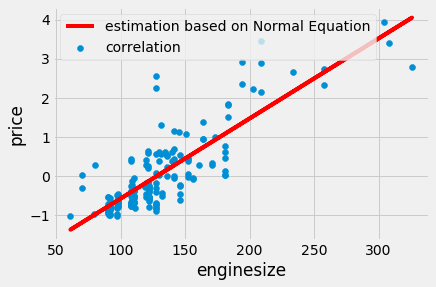

In [29]:
theta['enginesize'] = normalEquation(df, 'enginesize')
plotLineFit(df, 'enginesize', theta['enginesize'])
calcMSE(df, 'enginesize', theta['enginesize'])

0   -4.111903
1    0.001610
dtype: float64
mse =  0.2797970081780968


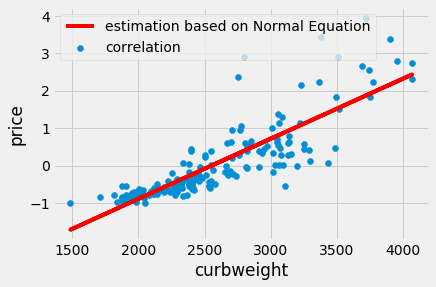

In [30]:
theta['curbweight'] = normalEquation(df, 'curbweight')
plotLineFit(df, 'curbweight', theta['curbweight'])
calcMSE(df, 'curbweight', theta['curbweight'])

# 14

In [31]:
def predict(test, feature, theta):
    ans = pd.DataFrame()
    ans['car_ID'] = test['car_ID']
    ans['price'] = test['price'].fillna(hypothesisFunc(test[feature], theta[feature]))
    return ans

In [32]:
predict(test,'enginesize', theta)

,car_ID,price
7,8,0.168016
24,25,-0.771974
36,37,-0.731105
80,81,-0.008192
82,83,0.576708
83,84,0.576708
84,85,0.576708
90,91,-0.506324
93,94,-0.628932
94,95,-0.628932
